In [1]:
import sys
import emission.public.pull_and_load_public_data as plpd
import pandas as pd
import emission.storage.timeseries.aggregate_timeseries as estag
public_ids = estag.TEST_PHONE_IDS
import arrow
from uuid import UUID
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

In [2]:
from_ts = arrow.get('2017-01-26T17:56:20.000-08:00').timestamp
from_ts
arrow.get(from_ts).to("America/Los_Angeles")

<Arrow [2017-01-26T17:56:20-08:00]>

In [3]:
end_ts = arrow.get("2017-01-26T18:15:00.000-08.00").timestamp
end_ts
arrow.get(end_ts)

<Arrow [2017-01-27T02:15:00+00:00]>

In [4]:
plpd.request_batched_data("https://e-mission.eecs.berkeley.edu",
                          from_ts ,end_ts, map(str, public_ids))

Data loaded to local server!


In [7]:
import emission.core.get_database as edb
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as pydt
import emission.storage.timeseries.abstract_timeseries as esta
import emission.storage.timeseries.timequery as estt
import numpy as np
import emission.analysis.point_features as pf
import attrdict as ad
import scipy.interpolate as spi
import emission.core.wrapper.entry as ecwe
import emission.core.wrapper.location as ecwl

In [8]:
def get_points_from_ts_for_range(ts, start_ts, end_ts):
    return ts.get_data_df("background/location", 
                          estt.TimeQuery('metadata.write_ts', 
                                         start_ts, end_ts))

In [9]:
iphone_id_3 = [UUID("c528bcd2-a88b-3e82-be62-ef4f2396967a")]
iphone_id_4 = [UUID("95e70727-a04e-3e33-b7fe-34ab19194f8b")]
android_id_3 = [UUID("86842c35-da28-32ed-a90e-2da6663c5c73")]
android_id_4 = [UUID("3bc0f91f-7660-34a2-b005-5c399598a369")]

In [10]:
iphone_ts_3 = map(lambda u: esta.TimeSeries.get_time_series(u),
                  iphone_id_3)
iphone_ts_4 = map(lambda u: esta.TimeSeries.get_time_series(u),
                  iphone_id_4)
android_ts_3 = map(lambda u: esta.TimeSeries.get_time_series(u),
                   android_id_3)
android_ts_4 = map(lambda u: esta.TimeSeries.get_time_series(u),
                   android_id_4)

In [11]:
iphone_df_3 = get_points_from_ts_for_range(iphone_ts_3[0],from_ts,
                                           end_ts)
iphone_df_4 = get_points_from_ts_for_range(iphone_ts_4[0],from_ts,
                                           end_ts)
android_df_3 = get_points_from_ts_for_range(android_ts_3[0],from_ts,
                                            end_ts)  
android_df_4 = get_points_from_ts_for_range(android_ts_4[0],from_ts,
                                            end_ts)

In [12]:
iphone_df_3
#new = old[['A', 'C', 'D']].copy()
new_iphone_df_3 = iphone_df_3[['latitude','longitude','ts']].copy()
new_iphone_df_3.head()

,latitude,longitude,ts
0,37.87,-122.27,1485482180.00
1,37.87,-122.27,1485482181.00
2,37.87,-122.27,1485482182.00
3,37.87,-122.27,1485482183.00
4,37.87,-122.27,1485482184.00


In [13]:
new_iphone_df_4 = iphone_df_4[['latitude','longitude','ts']].copy()
new_android_df_3 = android_df_3[['latitude','longitude','ts']].copy()
new_android_df_4 = android_df_4[['latitude','longitude','ts']].copy()

In [14]:
ground_truth = pd.read_csv("/Users/jlamba/Desktop/e-mission berkeley trip ground truth - Sheet1 .csv")

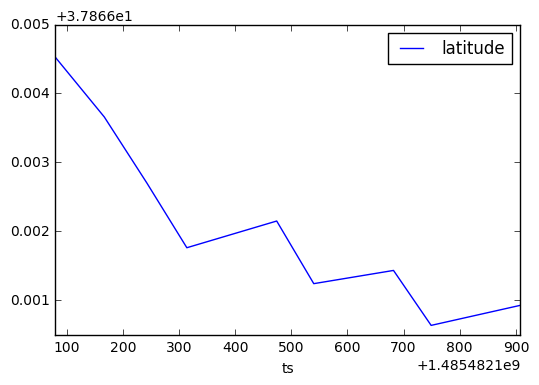

In [15]:
gt_time = ground_truth['fmt_time']
gt_time2 = []
for elem in gt_time:
    gt_time2.append(arrow.get('2017-01-26T'+ elem +'.000-08:00').timestamp)
ground_truth['ts'] = gt_time2
ground_truth
ground_truth.plot(x = 'ts',y = 'latitude')

[<matplotlib.lines.Line2D object at 0x1149abb10>, <matplotlib.lines.Line2D object at 0x11480ae10>, <matplotlib.lines.Line2D object at 0x11480a790>, <matplotlib.lines.Line2D object at 0x114816990>, <matplotlib.lines.Line2D object at 0x11482a650>] [u'latitude', u'latitude', u'latitude', u'latitude', u'latitude']


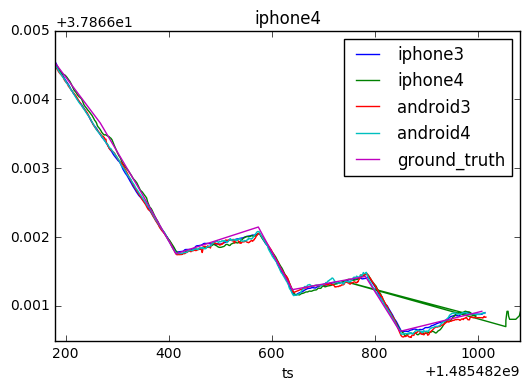

In [16]:
fig, axes = plt.subplots(nrows=1, ncols=1)

new_iphone_df_3.index = new_iphone_df_3['ts']
new_iphone_df_4.index = new_iphone_df_4['ts']
new_android_df_3.index = new_android_df_3['ts']
new_android_df_4.index = new_android_df_4['ts']

df1 = pd.DataFrame(new_iphone_df_3, index=new_iphone_df_3.index,columns=['latitude'])
df2 = pd.DataFrame(new_iphone_df_4, index=new_iphone_df_4.index,columns=['latitude'])
df3 = pd.DataFrame(new_android_df_3, index=new_android_df_3.index,columns=['latitude'])
df4 = pd.DataFrame(new_android_df_4, index=new_android_df_4.index,columns=['latitude'])

df1.plot(ax=axes, title = 'iphone3')
df2.plot(ax=axes,title = 'iphone4' )
df3.plot(ax=axes, label = 'android3')
df4.plot(ax = axes, label = 'android4')
ground_truth.plot(x = 'ts', y = 'latitude', ax = axes)

lines, labels = axes.get_legend_handles_labels()
print lines, labels
axes.legend(lines, ["iphone3", "iphone4", "android3", "android4","ground_truth"], loc='best') 

[<matplotlib.lines.Line2D object at 0x11495f310>, <matplotlib.lines.Line2D object at 0x114aa84d0>, <matplotlib.lines.Line2D object at 0x114a832d0>, <matplotlib.lines.Line2D object at 0x114aba290>, <matplotlib.lines.Line2D object at 0x1172a5cd0>] [u'longitude', u'longitude', u'longitude', u'longitude', u'longitude']


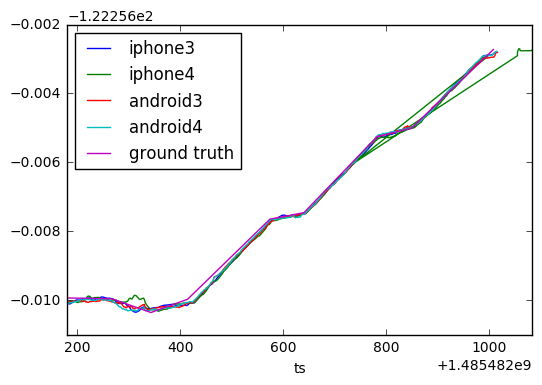

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=1)

df2_2 = pd.DataFrame(new_iphone_df_4, index=new_iphone_df_4.index,columns=['longitude'])
df3_3 = pd.DataFrame(new_android_df_3, index=new_android_df_3.index,columns=['longitude'])
df4_4 = pd.DataFrame(new_android_df_4, index=new_android_df_4.index,columns=['longitude'])
df1_1 = pd.DataFrame(new_iphone_df_3, index=new_iphone_df_3.index,columns=['longitude'])

df1_1.plot(ax=axes)
df2_2.plot(ax=axes)
df3_3.plot(ax=axes)
df4_4.plot(ax = axes)
ground_truth.plot(x = 'ts', y = 'longitude', ax = axes)
lines, labels = axes.get_legend_handles_labels()
print lines, labels
axes.legend(lines, ["iphone3", "iphone4", "android3", "android4", 'ground truth'], loc='best')

- Function of the graph to form a periodic x interval so we can calculate differences and average 
- Average of four trips - plot Average against Ground Truth
 - Points lying within a certain range of the Ground Truth ( Trial and Error )
 - How to determine how many points are valuable? The percentage of points - the quantity of points. 

In [18]:
#Interpolation to get y values for periodic x values
x_range = axes.get_xlim()
min_x = x_range[0]
max_x = x_range[1]
periodic_xrange = np.linspace(min_x, max_x, num=50)
#Using df1 for now
#np.interp(2.01, x, y) # where y is a function and x  values we already have or value of our range
df1 = pd.DataFrame(new_iphone_df_3, index=new_iphone_df_3.index,columns=['latitude'])
dfList = df1['latitude'].tolist()

In [19]:
import numpy as np

iphone_xnew = np.arange(from_ts, end_ts, 15 * 60) # 15 minutes
android_xnew = np.arange(from_ts, end_ts, 15 * 60) # 15 minutes

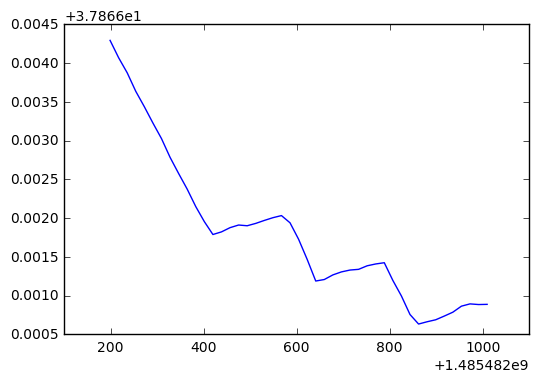

In [20]:
import scipy.interpolate as spi
import numpy as np
%matplotlib inline

def get_interpolated(x, y, xnew):
    # fn = spi.interp1d(x=x, y=y, bounds_error=False, fill_value=y.iloc[-1])
    fn = spi.interp1d(x=x, y=y, bounds_error=False)
    return fn(xnew)
newy = get_interpolated(df1.index.tolist(),dfList, periodic_xrange)
plt.plot(periodic_xrange, newy)

In [21]:
def get_interpolated_df_latitude(sensor_df, xnew):
    local_dt_new = map(pydt.datetime.fromtimestamp, xnew)
    fmt_time_new = map(lambda dt: dt.isoformat(), local_dt_new)
    interpolated_series = get_interpolated(sensor_df.ts, sensor_df.latitude, xnew)
    interpolated_df = pd.DataFrame(data={'ts': xnew, 'metadata_write_ts': xnew, 'local_dt': local_dt_new, 'fmt_time': fmt_time_new, 'y': interpolated_series})
    return interpolated_df

In [22]:
get_interpolated_df_latitude(iphone_df_3,periodic_xrange).head()

,fmt_time,local_dt,metadata_write_ts,ts,y
0,2017-01-26T17:56:20,2017-01-26 17:56:20.000000,1485482180.00,1485482180.00,nan
1,2017-01-26T17:56:38.428571,2017-01-26 17:56:38.428571,1485482198.43,1485482198.43,37.87
2,2017-01-26T17:56:56.857142,2017-01-26 17:56:56.857142,1485482216.86,1485482216.86,37.87
3,2017-01-26T17:57:15.285712,2017-01-26 17:57:15.285712,1485482235.29,1485482235.29,37.87
4,2017-01-26T17:57:33.714283,2017-01-26 17:57:33.714283,1485482253.71,1485482253.71,37.87


In [23]:
def get_interp_distance_df(android3_ts, android4_ts, ios3_ts, ios4_ts, ground_truth_df, start_ts, end_ts):
    android3_df = android3_ts.get_data_df("background/location", estt.TimeQuery('metadata.write_ts', start_ts, end_ts))
    android4_df = android4_ts.get_data_df("background/location", estt.TimeQuery('metadata.write_ts', start_ts, end_ts))
    ios3_df = ios3_ts.get_data_df("background/location", estt.TimeQuery('metadata.write_ts', start_ts, end_ts))
    ios4_df = ios4_ts.get_data_df("background/location", estt.TimeQuery('metadata.write_ts', start_ts, end_ts))
    android3_latf = spi.interp1d(x=android3_df.ts, y=android3_df.latitude, bounds_error=False,
                                fill_value="extrapolate")
    android3_lngf = spi.interp1d(x=android3_df.ts, y=android3_df.longitude, bounds_error=False, 
                                fill_value="extrapolate")
    android4_latf = spi.interp1d(x=android4_df.ts, y=android4_df.latitude, bounds_error=False, 
                                fill_value="extrapolate")
    android4_lngf = spi.interp1d(x=android4_df.ts, y=android4_df.longitude, bounds_error=False, 
                                fill_value="extrapolate")
    ios3_latf = spi.interp1d(x=ios3_df.ts, y=ios3_df.latitude, bounds_error=False, 
                            fill_value=(ios3_df.latitude.iloc[0], ios3_df.latitude.iloc[-1]))
    ios3_lngf = spi.interp1d(x=ios3_df.ts, y=ios3_df.longitude, bounds_error=False, 
                            fill_value=(ios3_df.longitude.iloc[0], ios3_df.longitude.iloc[-1]))
    ios4_latf = spi.interp1d(x=ios4_df.ts, y=ios4_df.latitude, bounds_error=False, 
                            fill_value=(ios4_df.latitude.iloc[0], ios4_df.latitude.iloc[-1]))
    ios4_lngf = spi.interp1d(x=ios4_df.ts, y=ios4_df.longitude, bounds_error=False, 
                            fill_value=(ios4_df.longitude.iloc[0], ios4_df.longitude.iloc[-1]))
    ground_truth_latf = spi.interp1d(x = ground_truth_df.ts, y = ground_truth.latitude, bounds_error=False, 
                                     fill_value=(ground_truth.latitude.iloc[0], ground_truth.latitude.iloc[-1]))
    ground_truth_lngf = spi.interp1d(x = ground_truth_df.ts, y = ground_truth.longitude, bounds_error=False, 
                                     fill_value=(ground_truth.longitude.iloc[0], ground_truth.longitude.iloc[-1]))
    ts_new = np.arange(int(start_ts), int(end_ts), 1)
    fmt_time_new = map(lambda ts: pydt.datetime.fromtimestamp(ts).isoformat(), ts_new)
    interp_df = pd.DataFrame({"ts": ts_new, "fmt_time": fmt_time_new,
                            "android3_lat": android3_latf(ts_new), "android3_lng": android3_lngf(ts_new),
                              "android4_lat": android4_latf(ts_new), "android4_lng": android4_lngf(ts_new),
                              "ios3_lat": ios3_latf(ts_new),"ios3_lng": ios3_lngf(ts_new),
                            "ios4_lat": ios4_latf(ts_new), "ios4_lng": ios4_lngf(ts_new), 
                              "ground_truth_lat":ground_truth_latf(ts_new),"ground_truth_lng":ground_truth_lngf(ts_new) },
                             index=ts_new)
    baseline_distances_1 = np.abs(interp_df.apply(calDistance1, axis=1))
    baseline_distances_2 = np.abs(interp_df.apply(calDistance2, axis=1))
    baseline_distances_3 = np.abs(interp_df.apply(calDistance3, axis=1))
    baseline_distances_4 = np.abs(interp_df.apply(calDistance4, axis=1))

    interp_df["mean_lat"] = interp_df.apply(meanLat, axis=1)
    interp_df["mean_lng"] = interp_df.apply(meanLng, axis=1)
    
    interp_df["baseline_distances1"] = baseline_distances_1
    interp_df["baseline_distances2"] = baseline_distances_2
    interp_df["baseline_distances3"] = baseline_distances_3
    interp_df["baseline_distances4"] = baseline_distances_4
    interp_df["ground_distances"] = np.abs(interp_df.apply(groundDistance, axis=1))
    return interp_df

In [24]:
def calDistance1(row):
    return pf.calDistance(ad.AttrDict({"latitude": row["android3_lat"], "longitude": row["android3_lng"]}),
                          ad.AttrDict({"latitude": row["android4_lat"], "longitude": row["android4_lng"]}))

In [25]:
def calDistance2(row):
    return pf.calDistance(ad.AttrDict({"latitude": row["ios3_lat"], "longitude": row["ios3_lng"]}),
                          ad.AttrDict({"latitude": row["ios4_lat"], "longitude": row["ios4_lng"]}))

In [26]:
def calDistance3(row):
    return pf.calDistance(ad.AttrDict({"latitude": row["ios3_lat"], "longitude": row["ios3_lng"]}),
                          ad.AttrDict({"latitude": row["android3_lat"], "longitude": row["android3_lng"]}))

In [27]:
def calDistance4(row):
    return pf.calDistance(ad.AttrDict({"latitude": row["ios4_lat"], "longitude": row["ios4_lng"]}),
                          ad.AttrDict({"latitude": row["android4_lat"], "longitude": row["android4_lng"]}))

In [28]:
def groundDistance(row):
    print "calculating distances for row %s " % row
    return pf.calDistance(ad.AttrDict({"latitude": row["ground_truth_lat"], "longitude": row["ground_truth_lng"]}),
                          ad.AttrDict({"latitude": row["mean_lat"], "longitude": row["mean_lng"]}))

In [29]:
def meanLat(row):
    return np.mean([row["android3_lat"], row["android4_lat"], 
                    row["ios3_lat"], row["ios4_lat"]])

In [30]:
def meanLng(row):
    return np.mean([row["android3_lng"], row["android4_lng"],
                    row["ios3_lng"], row["ios4_lng"]])

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
distances = get_interp_distance_df(android_ts_3[0],android_ts_4[0],
                                   iphone_ts_3[0], iphone_ts_4[0], ground_truth, from_ts, end_ts)

calculating distances for row android3_lat                         37.87
android3_lng                       -122.27
android4_lat                         37.87
android4_lng                       -122.27
fmt_time               2017-01-26T17:56:20
ground_truth_lat                     37.87
ground_truth_lng                   -122.27
ios3_lat                             37.87
ios3_lng                           -122.27
ios4_lat                             37.87
ios4_lng                           -122.27
ts                              1485482180
mean_lat                             37.87
mean_lng                           -122.27
baseline_distances1                   2.94
baseline_distances2                   6.83
baseline_distances3                   8.19
baseline_distances4                   1.75
Name: 1485482180, dtype: object 
calculating distances for row android3_lat                         37.87
android3_lng                       -122.27
android4_lat                         37.87
andr

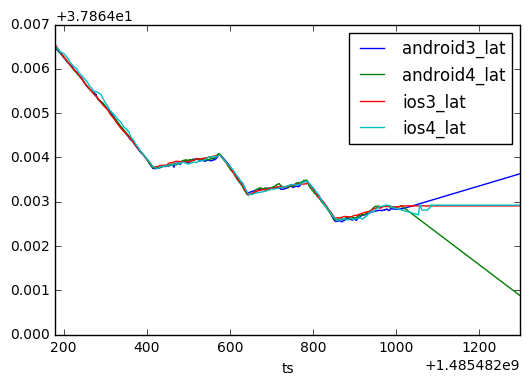

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=1)
distances.plot(x = "ts", y = "android3_lat", ax = axes)
distances.plot(x = "ts", y = "android4_lat", ax = axes)
distances.plot(x = "ts", y = "ios3_lat", ax = axes)
distances.plot(x = "ts", y = "ios4_lat", ax = axes)

In [33]:
distances.head()

,android3_lat,android3_lng,android4_lat,android4_lng,fmt_time,ground_truth_lat,ground_truth_lng,ios3_lat,ios3_lng,ios4_lat,ios4_lng,ts,mean_lat,mean_lng,baseline_distances1,baseline_distances2,baseline_distances3,baseline_distances4,ground_distances
1485482180,37.87,-122.27,37.87,-122.27,2017-01-26T17:56:20,37.87,-122.27,37.87,-122.27,37.87,-122.27,1485482180,37.87,-122.27,2.94,6.83,8.19,1.75,13.28
1485482181,37.87,-122.27,37.87,-122.27,2017-01-26T17:56:21,37.87,-122.27,37.87,-122.27,37.87,-122.27,1485482181,37.87,-122.27,2.57,5.29,7.75,1.93,13.19
1485482182,37.87,-122.27,37.87,-122.27,2017-01-26T17:56:22,37.87,-122.27,37.87,-122.27,37.87,-122.27,1485482182,37.87,-122.27,2.98,4.00,7.45,2.42,12.97
1485482183,37.87,-122.27,37.87,-122.27,2017-01-26T17:56:23,37.87,-122.27,37.87,-122.27,37.87,-122.27,1485482183,37.87,-122.27,3.07,4.48,7.09,2.94,12.69
1485482184,37.87,-122.27,37.87,-122.27,2017-01-26T17:56:24,37.87,-122.27,37.87,-122.27,37.87,-122.27,1485482184,37.87,-122.27,2.63,5.49,7.32,3.68,12.31


In [34]:
distances.baseline_distances1.describe()

count   1120.00
mean      54.49
std      103.13
min        0.08
25%        3.51
50%        6.02
75%       11.93
max      400.71
Name: baseline_distances1, dtype: float64

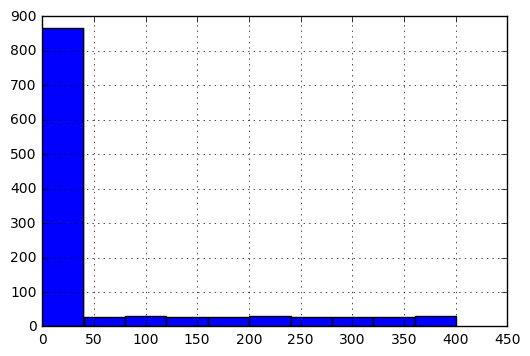

In [35]:
distances.baseline_distances1.hist()

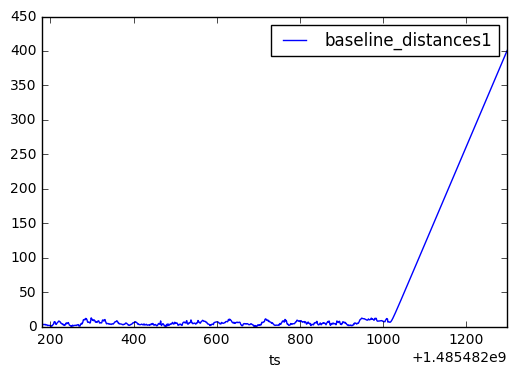

In [36]:
distances.plot(x = "ts", y = "baseline_distances1")

In [37]:
distances.baseline_distances2.describe()

count   1120.00
mean       7.52
std        6.07
min        0.20
25%        4.63
50%        5.28
75%        8.53
max       43.57
Name: baseline_distances2, dtype: float64

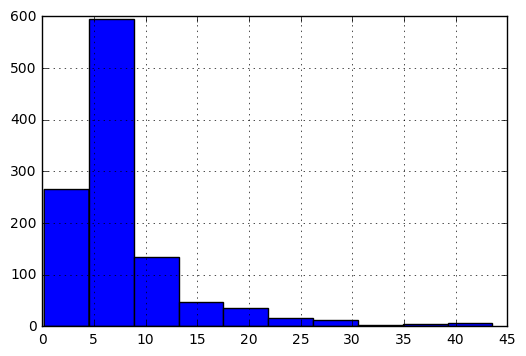

In [38]:
distances.baseline_distances2.hist()

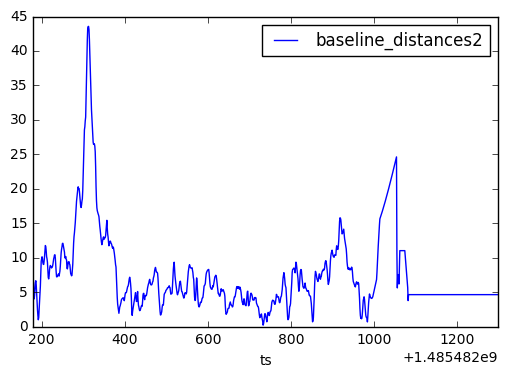

In [39]:
distances.plot(x = "ts", y = "baseline_distances2")

In [40]:
distances.baseline_distances3.describe()

count   1120.00
mean      15.36
std       21.42
min        0.16
25%        4.45
50%        6.41
75%       10.36
max       91.05
Name: baseline_distances3, dtype: float64

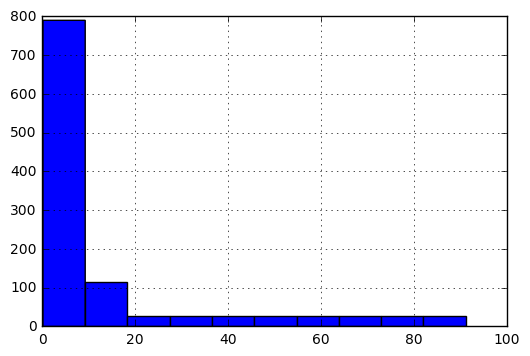

In [41]:
distances.baseline_distances3.hist()

In [42]:
distances.baseline_distances4.describe()

count   1120.00
mean      45.95
std       78.77
min        0.71
25%        5.36
50%        9.12
75%       29.49
max      310.99
Name: baseline_distances4, dtype: float64

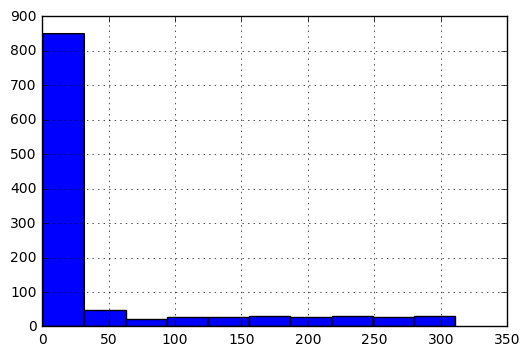

In [43]:
distances.baseline_distances4.hist()

In [44]:
distances.ground_distances.describe()

count   1120.00
mean      14.24
std       11.72
min        0.33
25%        6.47
50%       10.11
75%       16.48
max       54.40
Name: ground_distances, dtype: float64

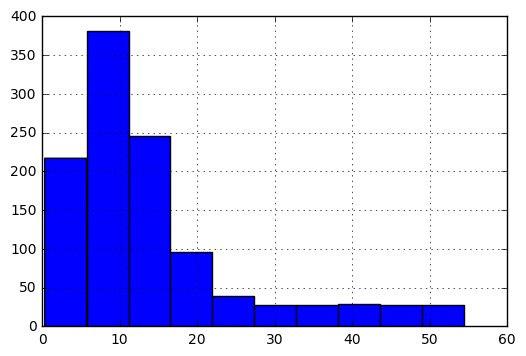

In [45]:
distances.ground_distances.hist()

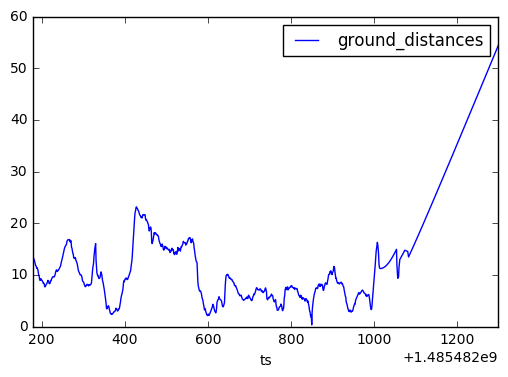

In [46]:
distances.plot(x="ts", y="ground_distances")

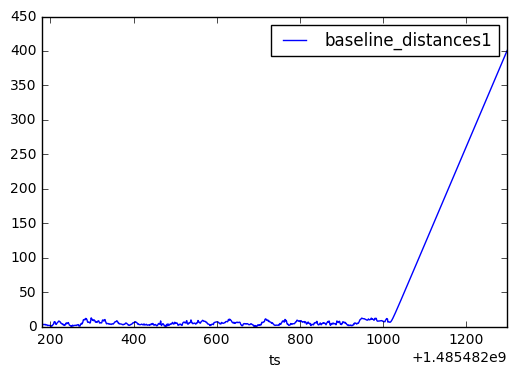

In [47]:
distances.plot(x='ts', y = 'baseline_distances1')

In [48]:
import scipy.stats as spis

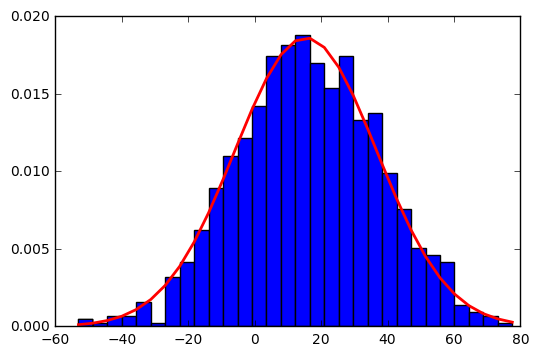

In [52]:
#Example: Baseline Distances 3
mu, sigma = 15.36, 21.42 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')
plt.show()

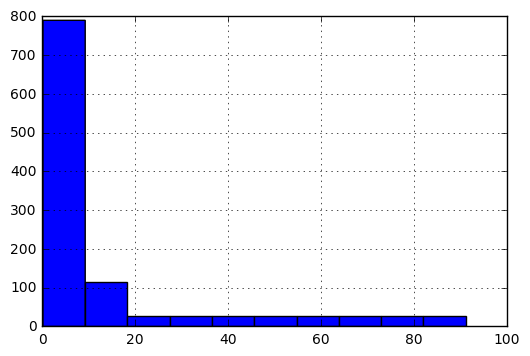

In [114]:
f_distances = distances.baseline_distances3.hist()

In [64]:
Quantity = []
d = {}
distances3 = distances[["fmt_time","ts", "mean_lat", "mean_lng", "baseline_distances3", 
                       "ground_distances"]].copy()
Threshold = sorted([100, 90, 80, 70, 60, 40, 30, 20, 15, 10, 5])
for T in Threshold:
    d["f_dist{0}".format(T)] = distances3[distances3.baseline_distances3 < T]
    Quantity.append(f_dist.baseline_distances3.describe()["count"])
d["f_dist5"].head()
# Note=> Ground_distances are distances between groun- truth and mean_lat/lng

,fmt_time,ts,mean_lat,mean_lng,baseline_distances3,ground_distances
1485482189,2017-01-26T17:56:29,1485482189,37.87,-122.27,4.99,11.38
1485482190,2017-01-26T17:56:30,1485482190,37.87,-122.27,4.75,11.17
1485482191,2017-01-26T17:56:31,1485482191,37.87,-122.27,4.05,11.01
1485482192,2017-01-26T17:56:32,1485482192,37.87,-122.27,3.58,10.41
1485482193,2017-01-26T17:56:33,1485482193,37.87,-122.27,3.02,9.94


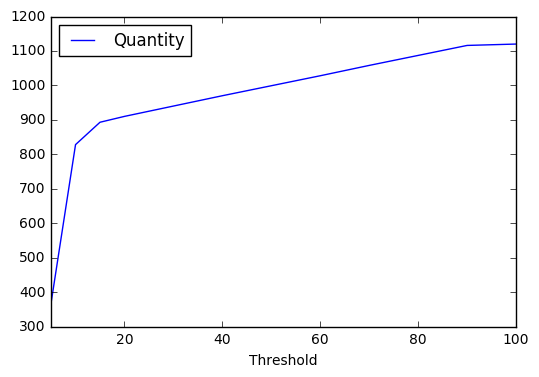

In [54]:
#TRIAL
#Baseline3
df_graph = pd.DataFrame({"Threshold": Threshold, "Quantity": Quantity}, index = Threshold)
df_graph.plot(x = "Threshold", y = "Quantity")

In [1]:
final_df = pd.DataFrame({"Threshold": [], "Quantity": [], "Quality": []})
#for each T in Threshold:
    

SyntaxError: invalid syntax (<ipython-input-1-75676f31f9ec>, line 2)

In [103]:
gt_gj = [{
  "type": "Feature",
  "geometry": {
    "type": "Point",
    "coordinates": [[37.8705228,-122.2659393], [37.8696579, -122.2659628], 
        [37.8686967, -122.2663615],
        [37.8677596, -122.2659781], [37.8681473, -122.2636508],
        [37.8672381, -122.2634622], [37.8674299, -122.2612558], 
        [37.8666323, -122.261009], [37.8669238, -122.2587255]]
  }
}]


In [57]:
s = new_iphone_df_3.ts

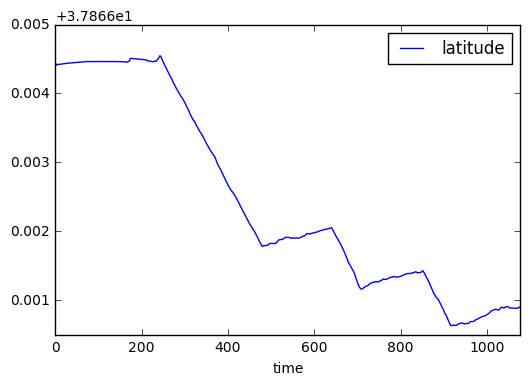

In [70]:
s = s - s.iloc[0]
df = pd.DataFrame()
df['time'] = s
df['latitude'] = new_iphone_df_3['latitude']
df.plot(x = 'time',y = 'latitude')

In [100]:
import emission.analysis.plotting.leaflet_osm.our_plotter as lo
import emission.analysis.plotting.geojson.geojson_feature_converter as gfc
import emission.analysis.plotting.leaflet_osm.ipython_helper as ipy

In [101]:
    ipy.inline_maps([lo.get_maps_for_geojson_unsectioned(
                [gfc.get_feature_list_from_df(iphone_df_3)]) + 
                    lo.get_maps_for_geojson_unsectioned(
                [gfc.get_feature_list_from_df(iphone_df_4)]) + 
                     lo.get_maps_for_geojson_unsectioned(
                [gfc.get_feature_list_from_df(android_df_3)]) +
                     lo.get_maps_for_geojson_unsectioned(
                [gfc.get_feature_list_from_df(android_df_4)])])

Found 802 features from 802 points
Found 762 features from 762 points
Found 876 features from 876 points
Found 871 features from 871 points


In [105]:
import geojson as gj

In [104]:
ipy.inline_maps([lo.get_maps_for_geojson_unsectioned(gt_gj)])

In [28]:
gfc.get_feature_list_from_df(iphone_df_3)["features"][1]

Found 802 features from 802 points


{"geometry": {"coordinates": [[-122.2660181031625, 37.8704297578282], [-122.2660181031625, 37.8704297578282], [-122.266009633991, 37.8704386679101], [-122.2660011139979, 37.87042178815316], [-122.265997706095, 37.87041510458837], [-122.266013263348, 37.87042164260856], [-122.265997706095, 37.87041510458837], [-122.2660509311801, 37.87043693944614], [-122.2660993785805, 37.87046200133662], [-122.2660993785805, 37.87046200133662], [-122.266129888708, 37.87045705601375], [-122.266129888708, 37.87045156586717], [-122.2661252786613, 37.87046615037869], [-122.2661043239033, 37.87050889808486], [-122.2661105265117, 37.87048668604146], [-122.266111448521, 37.87047503519605], [-122.2660997138566, 37.87045944485615], [-122.2660934274292, 37.87046904213528], [-122.2660801840222, 37.87046418063144], [-122.2660842073357, 37.87047520283411], [-122.2660922539628, 37.87048886533628], [-122.2661024798847, 37.87049896552961], [-122.2661156394726, 37.87051857918303], [-122.2661187407768, 37.8705342114324